# Simulate Boyajian's Star in ZTF

First, let's start with a simple simulation of Boyajian's star in ZTF:

I'm going to 
1) download the Kepler light curve for Boyajian's Star
2) download some random ZTF light curves
3) try to use the ZTF time stamps to simulate some light curves of the existing Kepler data, but with a ZTF cadence

In the second step:
4) make sure the error bars match those of ZTF for a given magnitude

In the third step, expand the simulations:
5) move the bright dips around in the ZTF observation time
6) make light curves with different median magnitude (and corresponding error bars --> make a scatter plot of light curve magnitudes and their uncertainties, define a Gaussian with the right mean and variance)
7) Maybe define a more general model for Boyajian's star-like light curves and simulate from that?

#### Open Questions
* Do we need to restrict ourselves in galactic latitude? Start by pulling $N$ random objects from across the sky

## Imports

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import numpy as np
import pandas as pd
import lightkurve

## Getting the Kepler Data

We're going to get the Kepler data using the `lightkurve` package:

In [3]:
from lightkurve import search_lightcurvefile
target = 'KIC 8462852'

Let's try and download the data for all quarters. 

In [21]:
lc = search_lightcurvefile(target, quarter=1).download().PDCSAP_FLUX
for q in range(2,18):
    lc = lc.append(search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX)

<IPython.core.display.Javascript object>


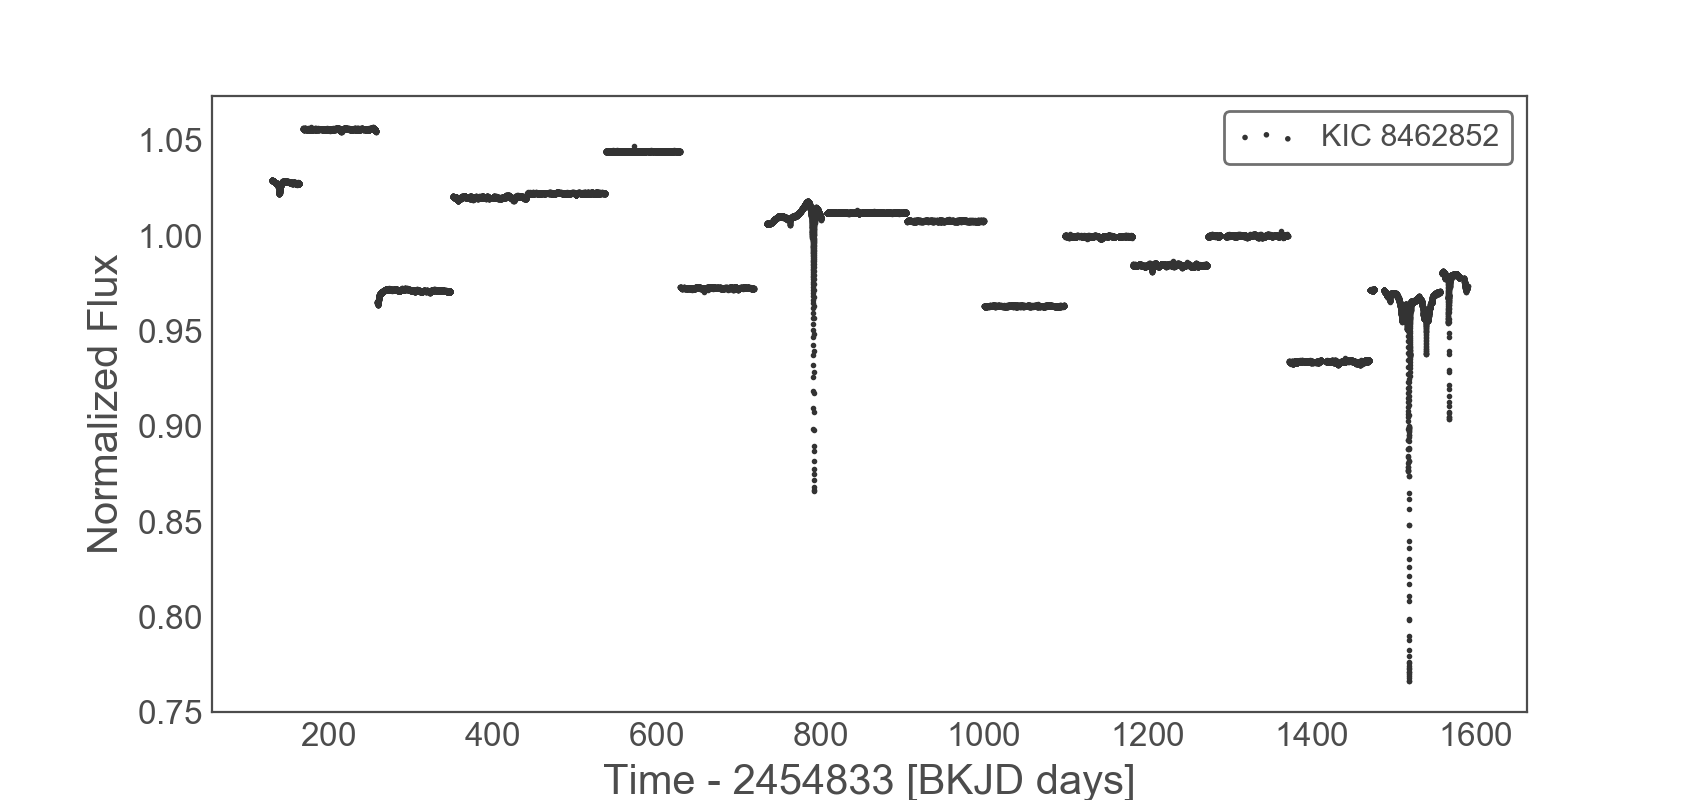

In [22]:
lc.scatter();

The `normalize` function normalizes the different quarters to the same mean magnitude:

In [23]:
lc = search_lightcurvefile(target, quarter=1).download().PDCSAP_FLUX.normalize()
for q in range(2,18):
    lc = lc.append(search_lightcurvefile(target, quarter=q).download().PDCSAP_FLUX.normalize())

<IPython.core.display.Javascript object>


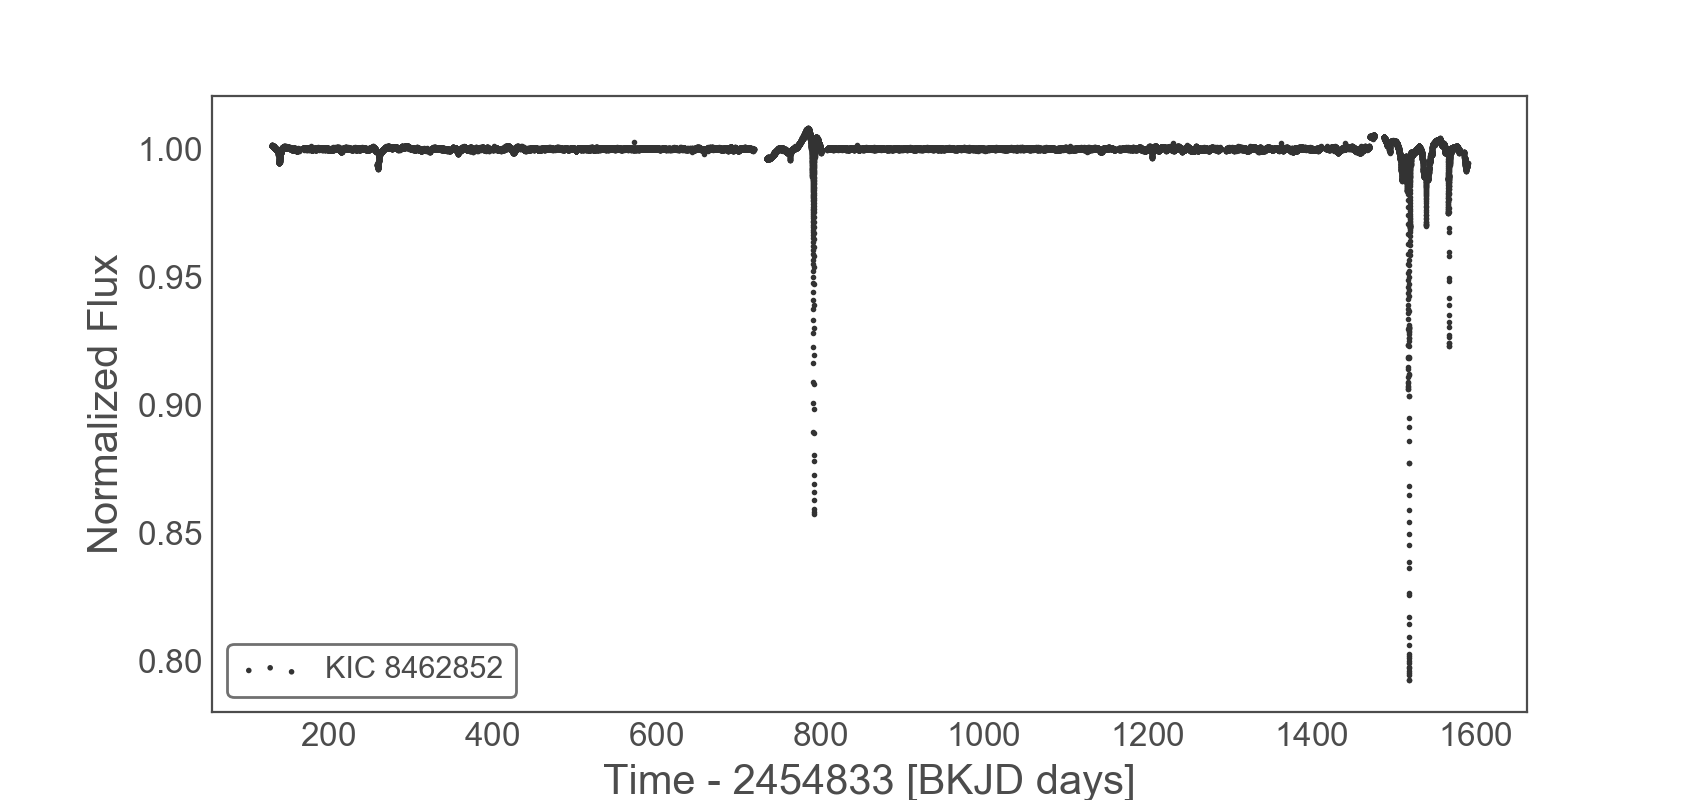

In [24]:
lc.scatter();

<IPython.core.display.Javascript object>


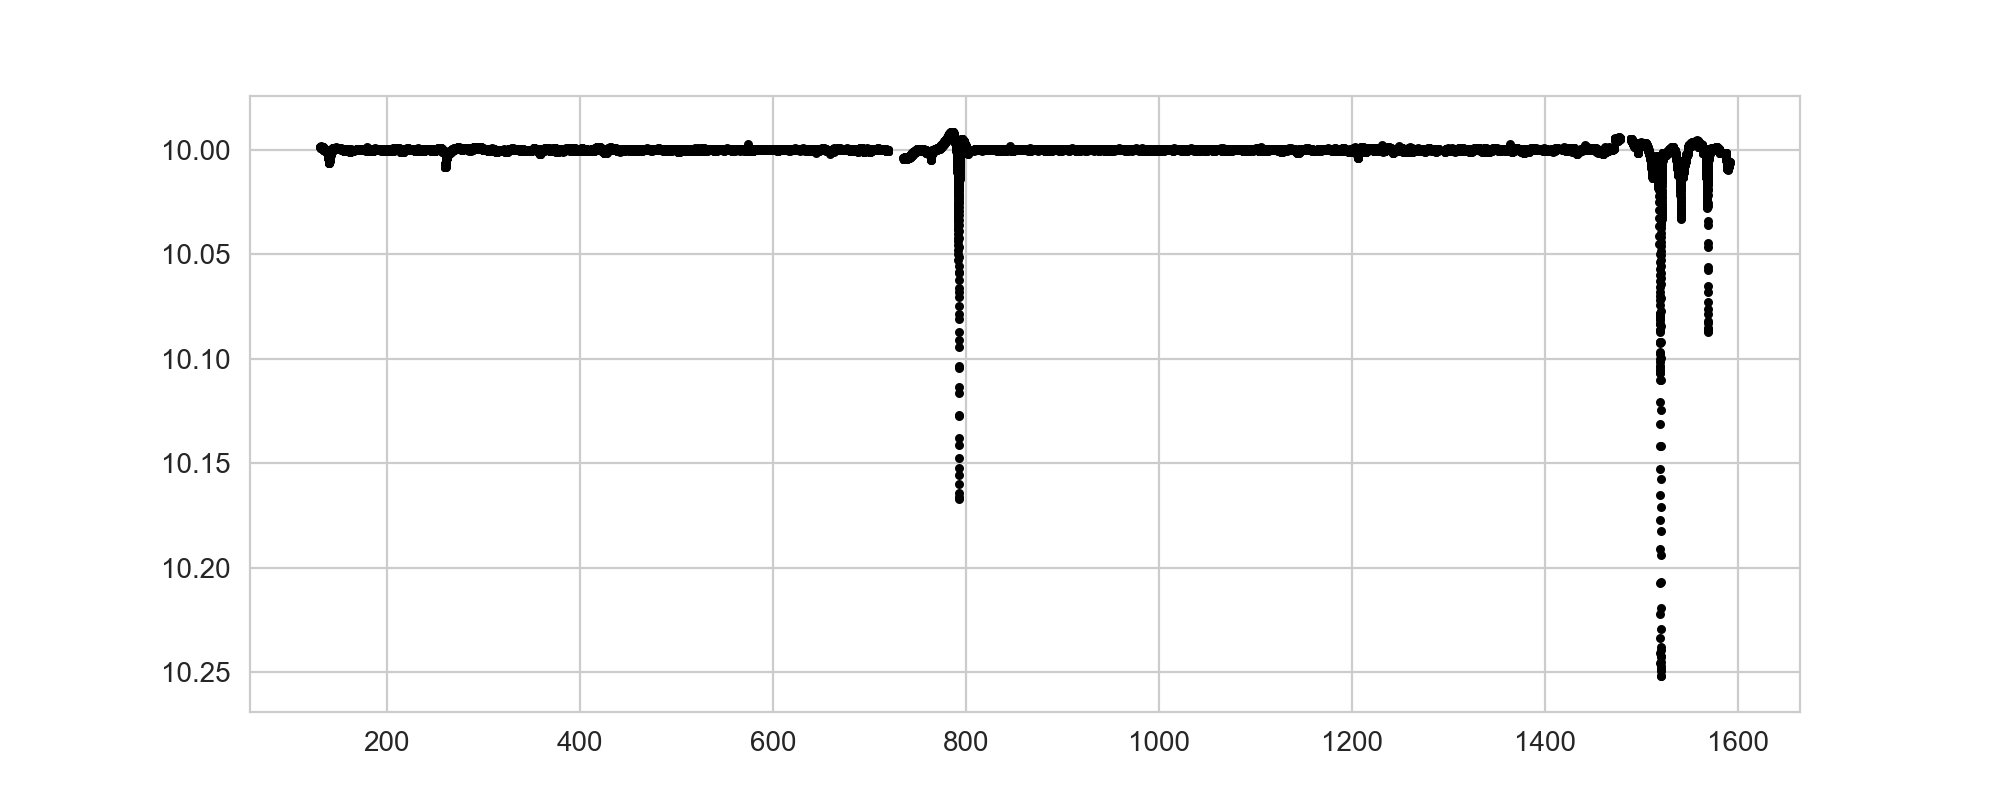

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.scatter(lc.time, -2.5*np.log10(lc.flux)+10, c="black", s=5)
ax.invert_yaxis()

### Let's fit some kind of moving average to this?

We're going to use pandas!

In [33]:
lc_df = pd.DataFrame({"time":lc.time, "flux":lc.flux})

In [40]:
rolling10 = lc_df.ewm(span=20, adjust=False).mean()

<IPython.core.display.Javascript object>


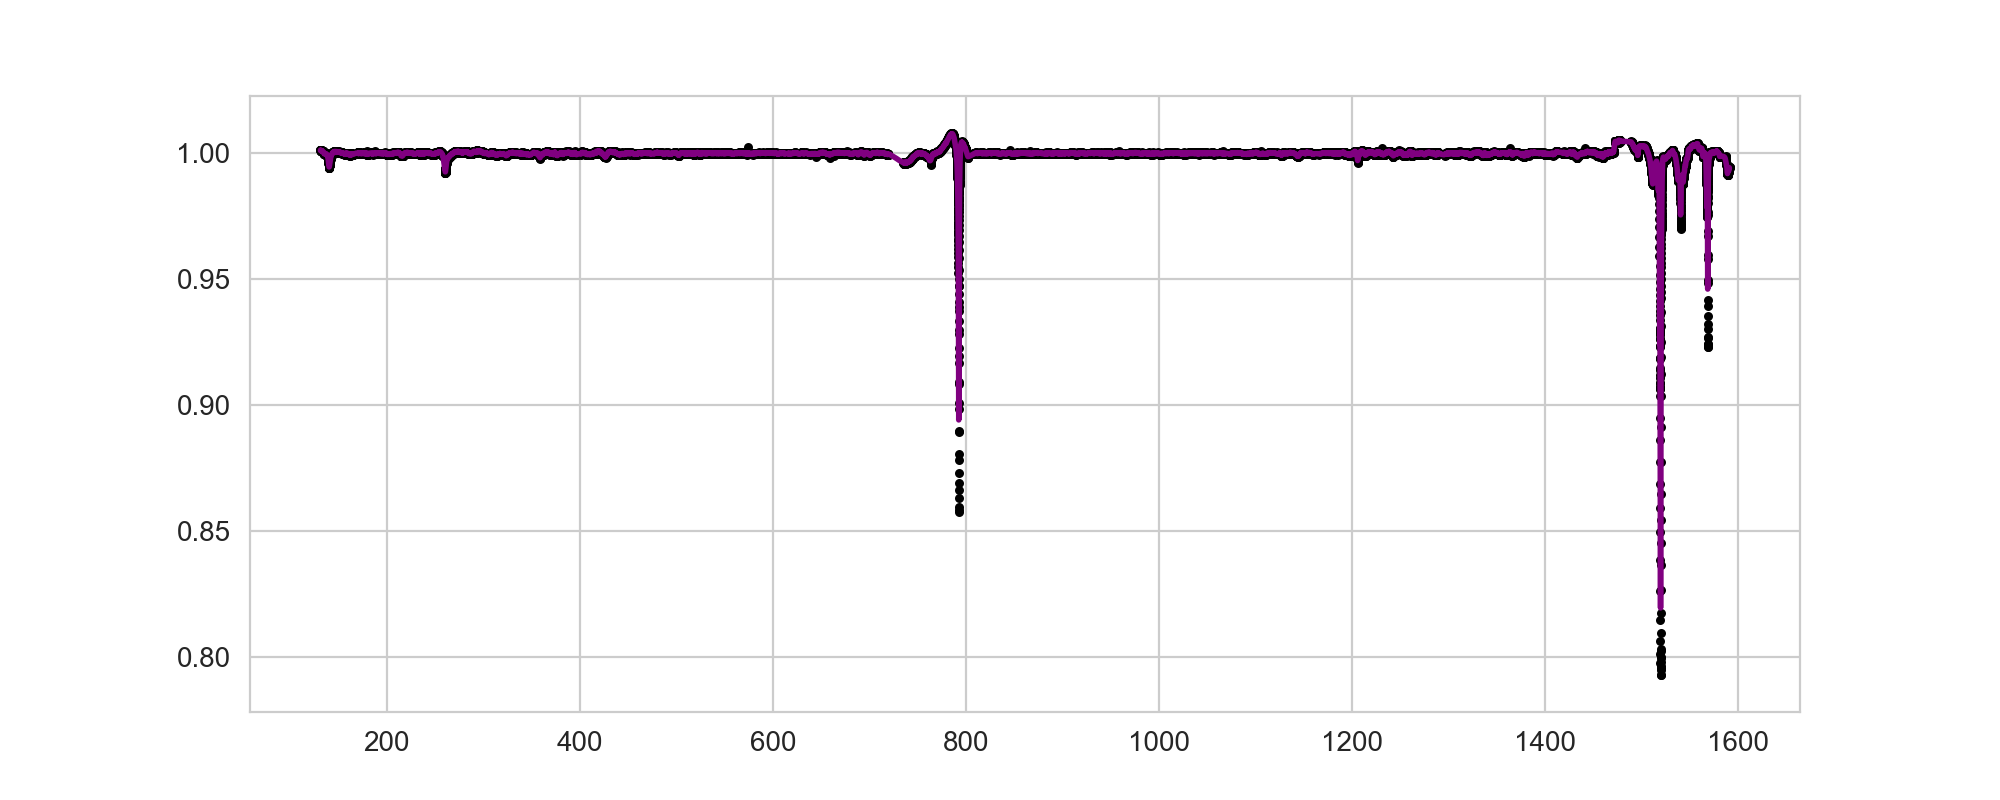

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(lc_df.time, lc_df.flux, c="black", s=5)
ax.plot(rolling10.time, rolling10.flux, color="purple", lw=2)

Not sure this is a good idea, because the dips are very sharp and I'm loosing signal by doing the moving average or its exponential version!